### SMS SPAM CLASSIFIER


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns

In [2]:
data= pd.read_csv("C:/Users/spam.csv", encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

### Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data=data[["v1", "v2"]]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#renaming the column
data.rename(columns={"v1":"Object", "v2":"Text"}, inplace= True)
data.head()

,Object,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
model= LabelEncoder()
data["Object"]= model.fit_transform(data["Object"])

In [8]:
data.head()

,Object,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.isnull().sum()

Object    0
Text      0
dtype: int64

In [10]:
data.duplicated().sum()

403

In [11]:
data= data.drop_duplicates(keep= "first")

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(5169, 2)

### EDA

In [14]:
data["Object"].value_counts()  

0    4516
1     653
Name: Object, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

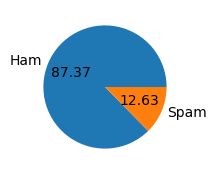

In [36]:
mp.figure(figsize=(2,2))
mp.pie(data["Object"].value_counts(), labels= ["Ham","Spam"], autopct="%0.2f" )
mp.show

In [16]:
#data is imblanced

In [48]:
import nltk

In [18]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\freedom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
data["num_characters"]= data["Text"].apply(len)
data.head()

,Object,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
data["num_words"]= data["Text"].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,Object,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
data["num_sentence"]= data["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,Object,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
data[["num_characters","num_words","num_sentence"]].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#ham
data[data["Object"]==0][["num_characters","num_words","num_sentence"]].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#spam
data[data["Object"]==1][["num_characters","num_words","num_sentence"]].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

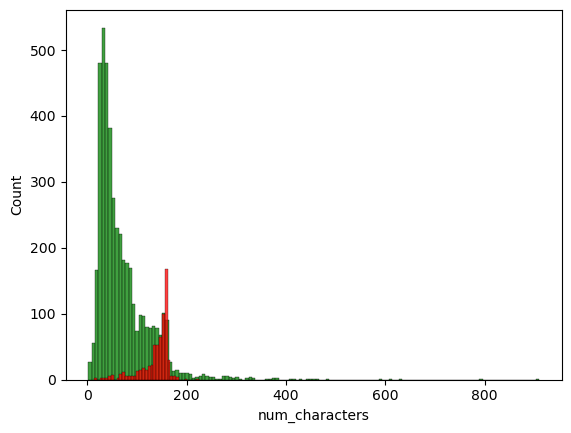

In [25]:
sns.histplot(data[data["Object"]==0]["num_characters"],color="green")
sns.histplot(data[data["Object"]==1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

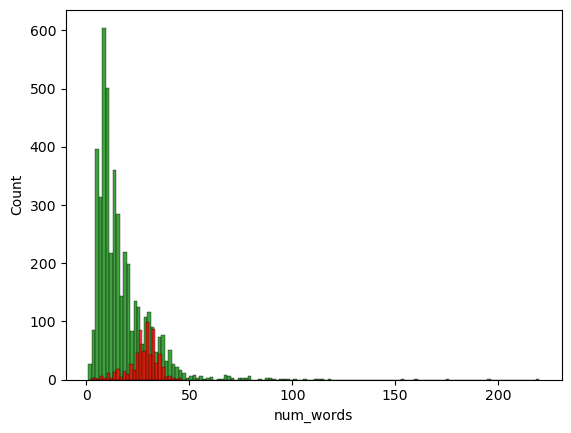

In [26]:
sns.histplot(data[data["Object"]==0]["num_words"],color="green")
sns.histplot(data[data["Object"]==1]["num_words"],color="red")

<Axes: xlabel='num_sentence', ylabel='Count'>

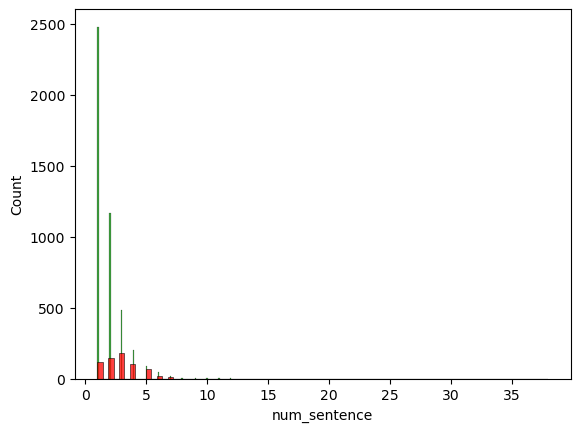

In [27]:
sns.histplot(data[data["Object"]==0]["num_sentence"],color="green")
sns.histplot(data[data["Object"]==1]["num_sentence"],color="red")

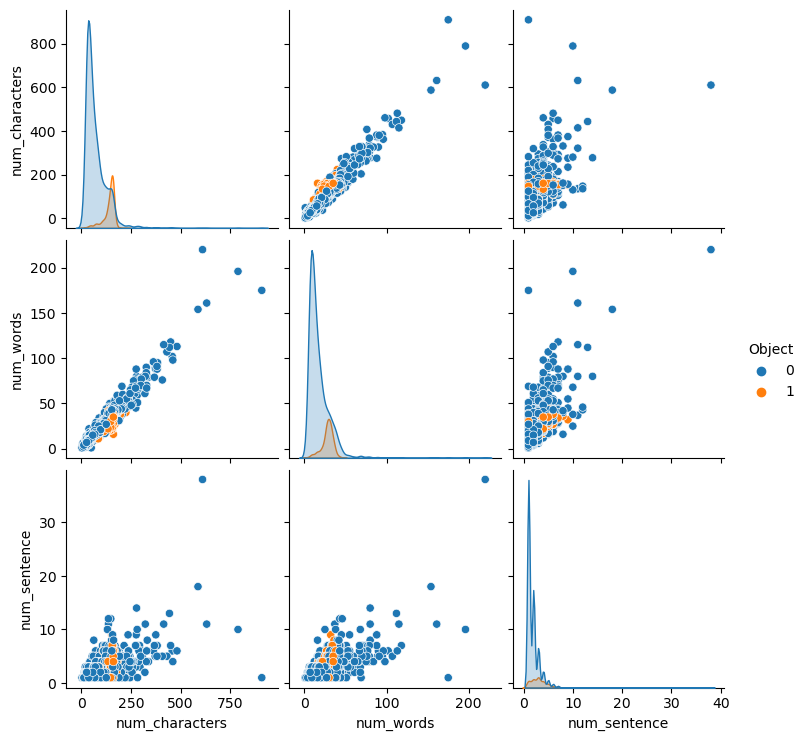

In [28]:
sns.pairplot(data, hue="Object")

In [29]:
data.corr()

C:\Users\freedom\AppData\Local\Temp\ipykernel_11304\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Object,num_characters,num_words,num_sentence
Object,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


C:\Users\freedom\AppData\Local\Temp\ipykernel_11304\3264515791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True)


<Axes: >

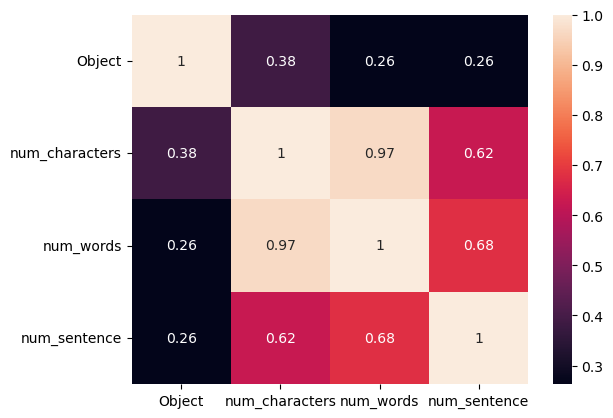

In [30]:
sns.heatmap(data.corr(), annot= True)

### Data preprocessing
convert to lower case, tokenization, removal of special characters, removing stop words and punctuation, stemming

In [52]:
from nltk.corpus import stopwords
nltk.download("stopwords")
import string
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\freedom\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [53]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [58]:
data["transformed_text"]=data["Text"].apply(transform_text)
data.head()

,Object,Text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
from wordcloud import WordCloud
wc= WordCloud(width=1200, height=500, min_font_size=10, background_color= "black")
wc2= WordCloud(width=1200, height=500, min_font_size=10, background_color= "white")

In [69]:
spam_wc= wc.generate(data[data["Object"]==1]["transformed_text"].str.cat(sep= " "))

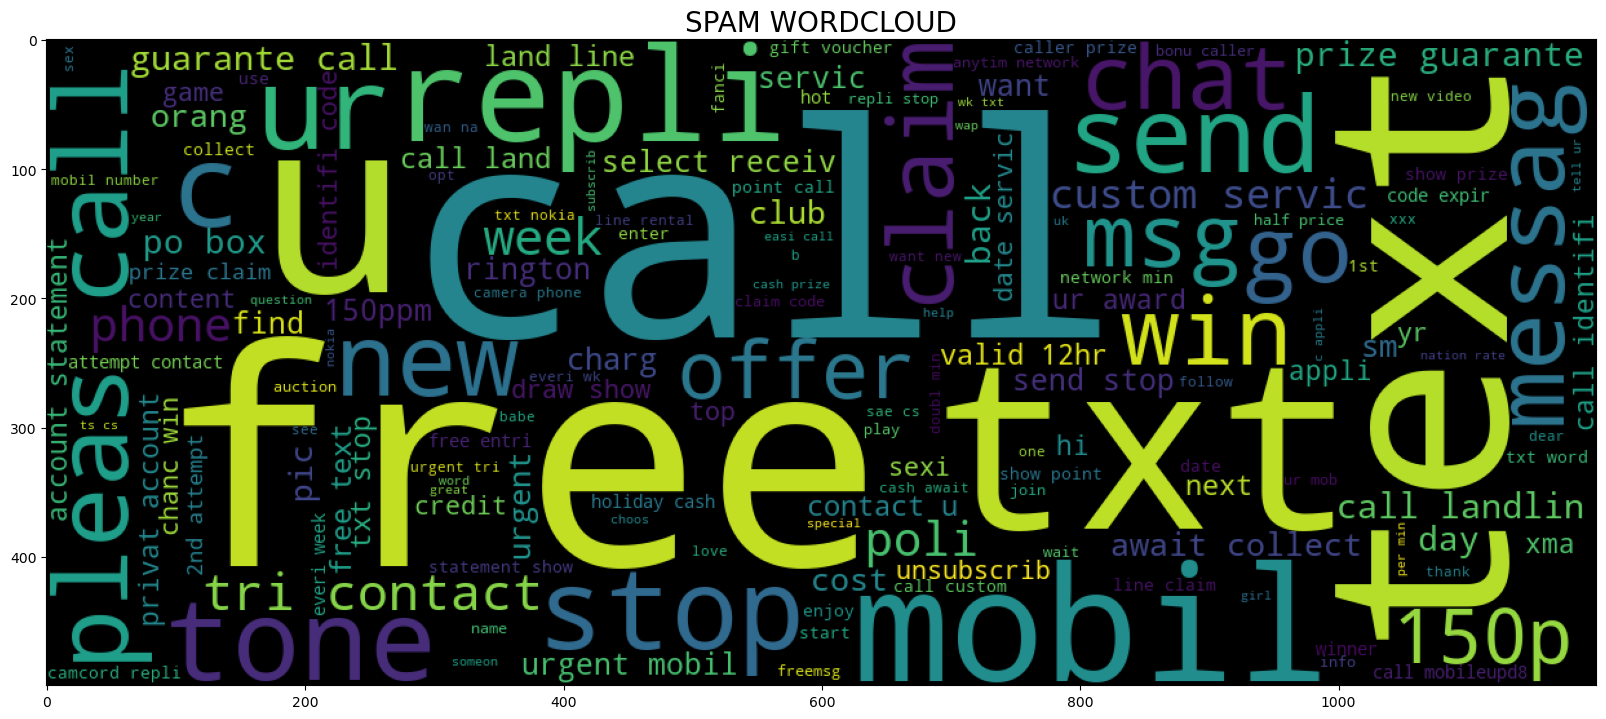

In [76]:
mp.figure(figsize=(20,10))
mp.title("SPAM WORDCLOUD", fontsize=20)
mp.imshow(spam_wc)

In [74]:
ham_wc= wc2.generate(data[data["Object"]==0]["transformed_text"].str.cat(sep= " "))

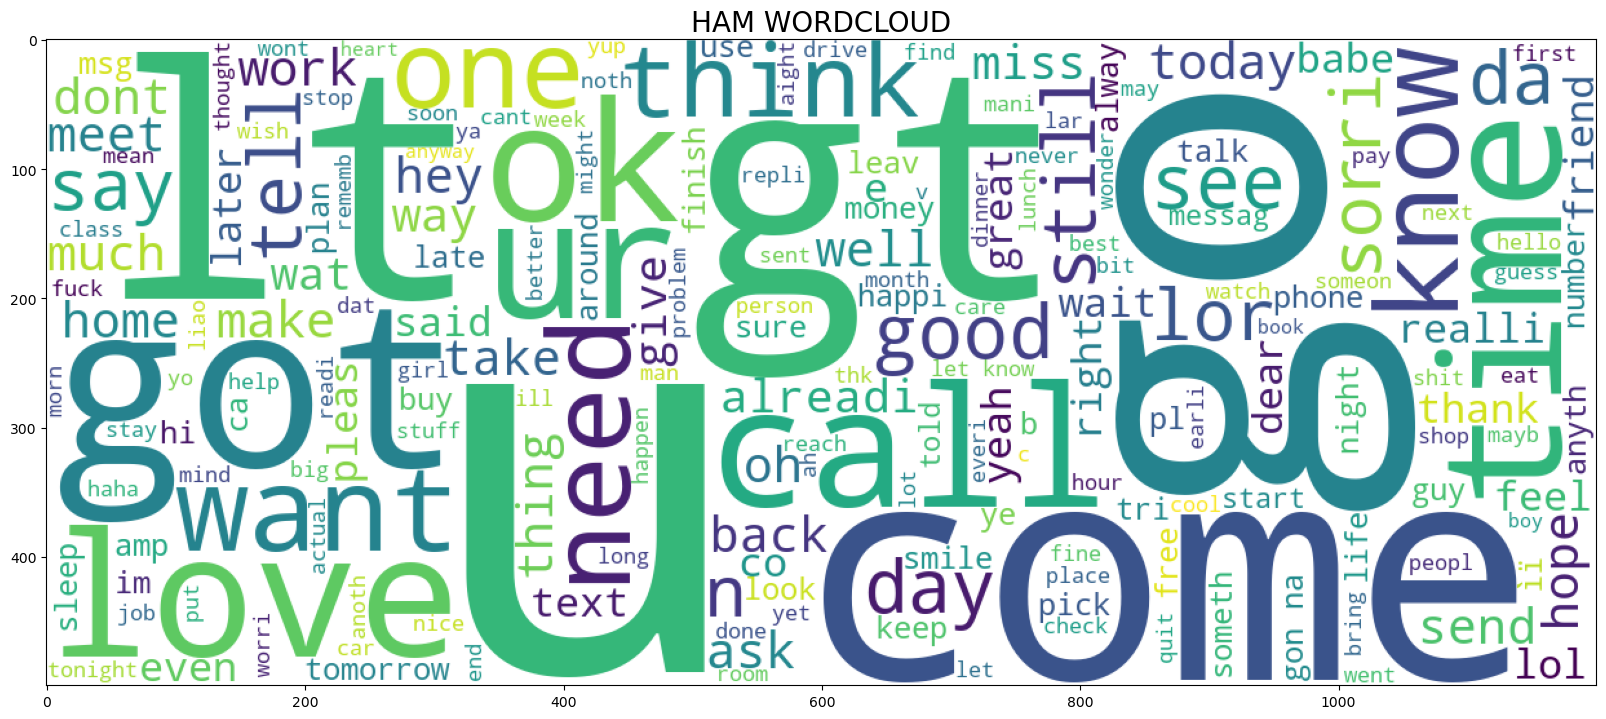

In [77]:
mp.figure(figsize=(20,10))
mp.title("HAM WORDCLOUD", fontsize=20)
mp.imshow(ham_wc)

### Model building

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [80]:
X = cv.fit_transform(data["transformed_text"]).toarray()

In [81]:
X.shape

(5169, 6708)

In [82]:
y = data["Object"].values

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [104]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [105]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [106]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [107]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [108]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [110]:
X = tf.fit_transform(data["transformed_text"]).toarray()

In [111]:
X.shape

(5169, 6708)

In [112]:
y = data["Object"].values

In [113]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [114]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [115]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Since we get best precision for MultinomialNB therefore we can go with the model TfidfVectorizer MultinomialNB